<a href="https://colab.research.google.com/github/5655530/AIFFEL_CORE_QUEST/blob/main/Project10/Project10_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# 라이브러리
import pandas as pd

In [3]:
# 데이터 불러오기
train = pd.read_csv('/content/drive/MyDrive/archive/train.csv')
test = pd.read_csv('/content/drive/MyDrive/archive/test.csv')

In [4]:
# 데이터 크기
train.shape, test.shape

((39116, 16), (9779, 15))

In [5]:
# 데이터 샘플
display(train.head(2))
display(test.head(2))

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,14963583,Room in South Harlem near Central Park,94219511,Gilles,Manhattan,Harlem,40.80167,-73.95781,Private room,70,3,3,2019-01-01,0.09,2,0
1,9458704,"Large 1BR Apartment, near Times Sq (2nd Floor)",49015331,Iradj,Manhattan,Hell's Kitchen,40.76037,-73.99016,Entire home/apt,240,2,64,2019-06-30,1.68,2,262


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,30913224,"Cozy and Sunny Room Williamsburg, Luxury Building",33771081,Rémy,Brooklyn,Williamsburg,40.70959,-73.94652,Private room,3,2,2019-05-08,0.31,1,0
1,971247,Sunny Artist Live/Work Apartment,5308961,Larry,Manhattan,Upper West Side,40.79368,-73.96487,Entire home/apt,3,159,2019-07-03,2.09,1,244


In [6]:
# 데이터 타입
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39116 entries, 0 to 39115
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              39116 non-null  int64  
 1   name                            39104 non-null  object 
 2   host_id                         39116 non-null  int64  
 3   host_name                       39099 non-null  object 
 4   neighbourhood_group             39116 non-null  object 
 5   neighbourhood                   39116 non-null  object 
 6   latitude                        39116 non-null  float64
 7   longitude                       39116 non-null  float64
 8   room_type                       39116 non-null  object 
 9   price                           39116 non-null  int64  
 10  minimum_nights                  39116 non-null  int64  
 11  number_of_reviews               39116 non-null  int64  
 12  last_review                     

In [7]:
# 결측치(train)
train.isnull().sum()

id                                   0
name                                12
host_id                              0
host_name                           17
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       7994
reviews_per_month                 7994
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [8]:
# 결측치(test)
test.isnull().sum()

id                                   0
name                                 4
host_id                              0
host_name                            4
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
minimum_nights                       0
number_of_reviews                    0
last_review                       2058
reviews_per_month                 2058
calculated_host_listings_count       0
availability_365                     0
dtype: int64

<Axes: >

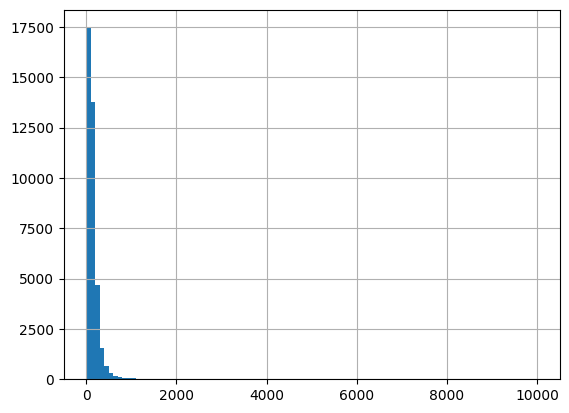

In [9]:
# target(hist)
train['price'].hist(bins=100)

<Axes: >

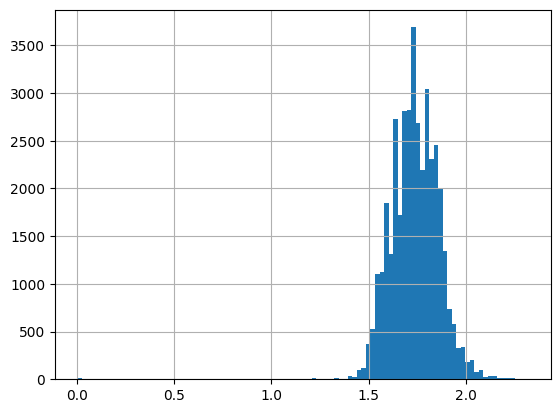

In [10]:
import numpy as np
train['price'] = np.log1p(train['price'])
train['price'].hist(bins=100)

In [11]:
# target(describe)
train['price'].describe()

count    39116.000000
mean         1.739758
std          0.121412
min          0.000000
25%          1.657941
50%          1.734031
75%          1.819777
max          2.323411
Name: price, dtype: float64

In [12]:
# 피처(host_id)
train['host_id'].value_counts()

219517861    256
107434423    181
30283594      99
137358866     82
12243051      80
            ... 
73369106       1
26620387       1
176660539      1
26004891       1
2609535        1
Name: host_id, Length: 30845, dtype: int64

In [13]:
# 결측치 컬럼 삭제(last_review)
train = train.drop('last_review', axis = 1)
train = train.drop('reviews_per_month', axis = 1)
test = test.drop('last_review', axis = 1)
test = test.drop('reviews_per_month', axis = 1)

In [14]:
# 결측치 채우기
train['name'] = train['name'].fillna('알수없음')
test['name'] = test['name'].fillna('알수없음')
train['host_name'] = train['host_name'].fillna('알수없음')
test['host_name'] = test['host_name'].fillna('알수없음')

In [15]:
# 결측치 확인
train.isnull().sum()
train.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [16]:
# 가격 값 복사
df = train['price']
df

0        1.660640
1        1.869461
2        1.794635
3        1.696413
4        1.570003
           ...   
39111    1.828693
39112    1.595709
39113    1.757132
39114    1.810252
39115    1.841074
Name: price, Length: 39116, dtype: float64

In [17]:
# 수치형 피처 선택
cols = train.select_dtypes(include=['int64', 'float64'])
cols

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,14963583,94219511,40.80167,-73.95781,1.660640,3,3,2,0
1,9458704,49015331,40.76037,-73.99016,1.869461,2,64,2,262
2,26871281,440022,40.73001,-74.00562,1.794635,60,1,1,0
3,698132,3577509,40.69128,-73.93653,1.696413,4,239,2,1
4,15783953,12475280,40.68899,-73.95555,1.570003,28,0,1,0
...,...,...,...,...,...,...,...,...,...
39111,35425034,107724585,40.71035,-74.00734,1.828693,30,0,2,346
39112,29754544,223846870,40.66102,-73.77035,1.595709,1,57,3,342
39113,13261616,24693048,40.77693,-73.94524,1.757132,7,0,1,0
39114,531258,2609535,40.73110,-73.99913,1.810252,30,19,1,259


In [18]:
# 검증 데이터 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    cols.drop('price',axis=1),df, test_size=0.3, random_state=1004)

In [19]:
# 머신러닝(회귀)
from sklearn.linear_model import LinearRegression

# 모델 선택
model = LinearRegression()

# 학습
model.fit(X_train, y_train)

#예측
pred = model.predict(X_test)

# 정확도 mean_squared_error(실제값, 예측값)
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, pred)

0.013077717694041107

In [20]:
# 릿지 회귀
from sklearn.linear_model import Ridge
model = Ridge()
model.fit(X_train, y_train)
pred = model.predict(X_test)
mean_squared_error(y_test, pred)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.86943e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


0.013081366972223464

In [21]:
# 라쏘 회귀
from sklearn.linear_model import Lasso
model = Lasso(alpha = 0.005) #기본 alpha값은 1
model.fit(X_train, y_train)
pred = model.predict(X_test)
mean_squared_error(y_test, pred)

0.014811389979665484

In [22]:
# 엘라스틱넷 회귀
from sklearn.linear_model import ElasticNet
model =  ElasticNet(alpha = 0.00001, l1_ratio = 0.6) #기본 alpha값은 1
model.fit(X_train, y_train)
pred = model.predict(X_test)
mean_squared_error(y_test, pred)

0.01307858620201061

In [23]:
# 랜덤 포레스트
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)
pred = model.predict(X_test)
mean_squared_error(y_test, pred)

0.009076774584135732

In [24]:
# Xgboost
from xgboost import XGBRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)
pred = model.predict(X_test)
mean_squared_error(y_test, pred)

0.009080763384576035

In [25]:
# baseline score(mse 51xxx) 보다 점수가 낮게 나오도록 도전해 보세요!
print(f"나의 점수는 (MSE '{mean_squared_error(y_test, pred)}'입니다.")

나의 점수는 (MSE '0.009080763384576035'입니다.
